In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import opendatasets as od
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from wrangle import load_dataset, encode_categorical_data, keep_selected_columns
from model import train_and_evaluate_models, evaluate_best_model
from explore import calculate_t_test, split_data_and_create_baseline, univariate_analysis,bivariate_analysis,multivariate_analysis

# Acquire & Prep

In [2]:
# Acquiring data from kaggle via API request
df =load_dataset()

Skipping, found downloaded files in "./breast-cancer-dataset" (use force=True to force download)


In [ ]:

df = encode_categorical_data(df)

In [3]:
# Keep 4 four columns I hypothesize to be the key driver
df = keep_selected_columns(df)

In [4]:
# display new dataframe 
# no null values
# feature engineering a new column was not necessary
# all Datatypes are appropriate
# encoded diagnosis from M and B to 0 and 1
df

,diagnosis,concave points_mean,radius_worst,perimeter_worst,concave points_worst
0,M,0.14710,25.380,184.60,0.2654
1,M,0.07017,24.990,158.80,0.1860
2,M,0.12790,23.570,152.50,0.2430
3,M,0.10520,14.910,98.87,0.2575
4,M,0.10430,22.540,152.20,0.1625
...,...,...,...,...,...
564,M,0.13890,25.450,166.10,0.2216
565,M,0.09791,23.690,155.00,0.1628
566,M,0.05302,18.980,126.70,0.1418
567,M,0.15200,25.740,184.60,0.2650


# EDA

Note that Benign is not cancerous, and Malignant is cancerous

malignant is 1 and is green

benign is 0 and is blue

/var/folders/mn/mp1xhgm522gc5vhffb_k61d00000gn/T/ipykernel_84626/3322070941.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='diagnosis', y='concave points_mean', palette='viridis', ci=None)


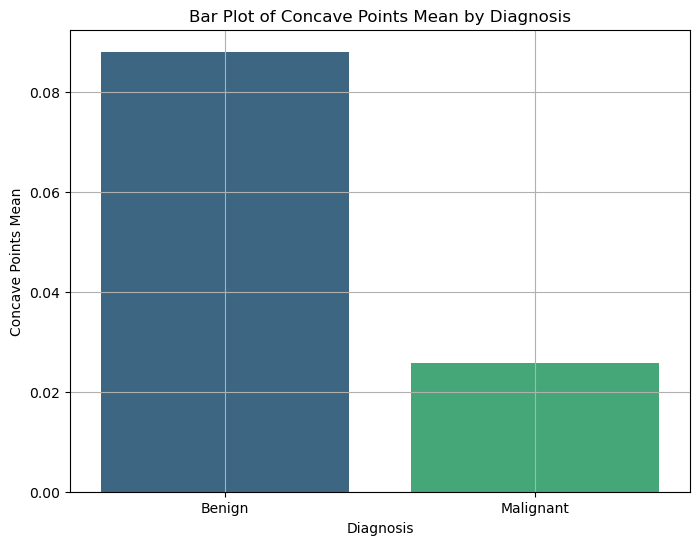

In [5]:

# Create a bar plot with 'diagnosis' on the x-axis
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='diagnosis', y='concave points_mean', palette='viridis', ci=None)
plt.xlabel('Diagnosis')
plt.ylabel('Concave Points Mean')
plt.title('Bar Plot of Concave Points Mean by Diagnosis')
plt.grid(True)
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.show()


In [6]:
# Select features and target variable
X = df[['concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst']].values
Y = df['diagnosis'].values

In [7]:
#this split function includes splitting 70, 15, 15. scale and produce a baseline
X_train, Y_train, X_validation, Y_validation, X_test, Y_test, accuracy = split_data_and_create_baseline(X, Y)


In [8]:
accuracy

0.6976744186046512

In [9]:
# all features chosen are those with a correlation coefficient of over .75
# ttest 
selected_features = ['concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst']
target_variable = 'diagnosis'
significance_level = 0.05

### Hypothesis

Hypothesis 1: Concave points_mean have a positive relationship with diagnosis
* Null: Concave points_mean does not have a relationship with diagnosis
* Alternative: concave points_mean have a negative relationship with diagnosis

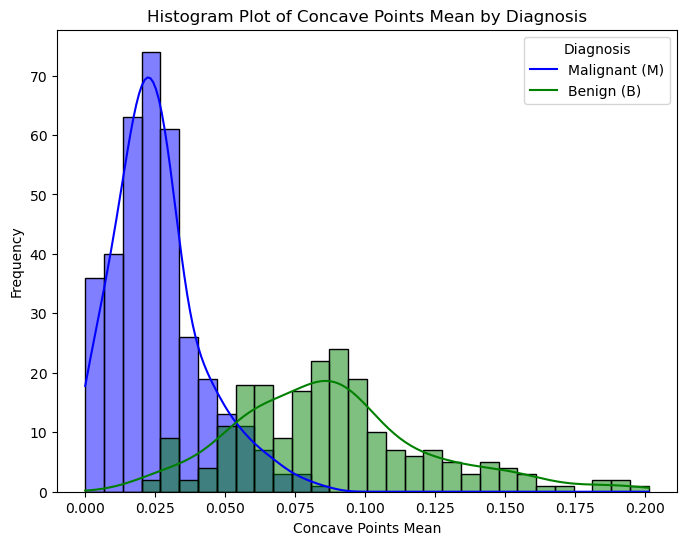

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram plot
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='concave points_mean', hue='diagnosis', bins=30, kde=True, palette={'M': 'green', 'B': 'blue'})

# Set plot labels and title
plt.xlabel('Concave Points Mean')
plt.ylabel('Frequency')
plt.title('Histogram Plot of Concave Points Mean by Diagnosis')

# Add a legend
plt.legend(title='Diagnosis', labels=['Malignant (M)', 'Benign (B)'])

# Show the plot
plt.show()


In [ ]:
calculate_t_test(df, ['concave points_mean'], target_variable)


Hypothesis 1: radius_worst have a positive relationship with diagnosis
* Null: radius_worst does not have a relationship with diagnosis
* Alternative: radius_worst have a negative relationship with diagnosis

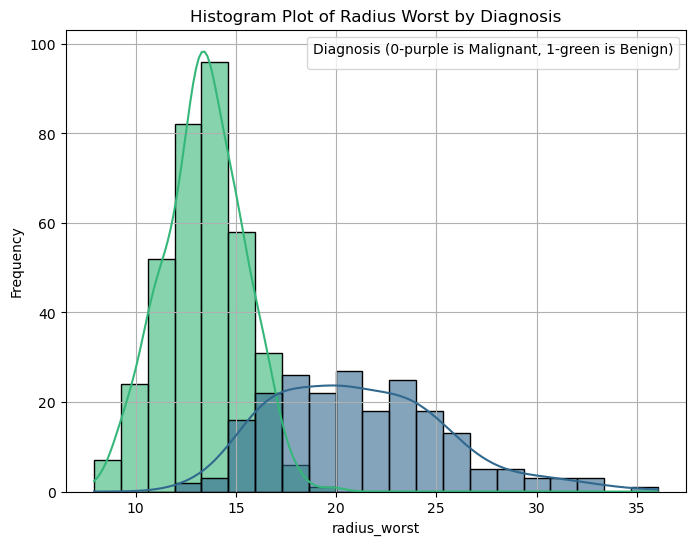

In [32]:


# Create a histogram plot with 'diagnosis' as the hue for 'concave points_worst'
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df, x='radius_worst', hue='diagnosis', palette='viridis', alpha=0.6, kde=True)

# Manually create a custom legend
custom_legend_labels = {0: 'Malignant', 1: 'Benign'}
custom_legend_colors = {0: 'purple', 1: 'green'}
handles, labels = ax.get_legend_handles_labels()
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=custom_legend_colors[int(label)], markersize=10, label=custom_legend_labels[int(label)]) for label in labels]

# Insert a legend stating 0 is Malignant and 1 is Benign
plt.legend(handles=custom_legend, title='Diagnosis (0-purple is Malignant, 1-green is Benign)', loc='upper right')

plt.xlabel('radius_worst')
plt.ylabel('Frequency')
plt.title('Histogram Plot of Radius Worst by Diagnosis')
plt.grid(True)
plt.show()



In [ ]:
calculate_t_test(df, ['radius_worst'], target_variable)


Hypothesis 1: perimeter_worst have a positive relationship with diagnosis
* Null: perimeter_worst does not have a relationship with diagnosis
* Alternative: perimeter_worst have a negative relationship with diagnosis

In [ ]:


# Create a histogram plot with 'diagnosis' as the hue for 'concave points_worst'
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df, x='perimeter_worst', hue='diagnosis', palette='viridis', alpha=0.7, kde=True)

# Manually create a custom legend
custom_legend_labels = {0: 'Malignant', 1: 'Benign'}
custom_legend_colors = {0: 'purple', 1: 'green'}
handles, labels = ax.get_legend_handles_labels()
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=custom_legend_colors[int(label)], markersize=10, label=custom_legend_labels[int(label)]) for label in labels]

# Insert a legend stating 0 is Malignant and 1 is Benign
plt.legend(handles=custom_legend, title='Diagnosis (0-purple is Malignant, 1-green is Benign)', loc='upper right')

plt.xlabel('perimeter_worst')
plt.ylabel('Frequency')
plt.title('Histogram Plot of Perimeter Worst by Diagnosis')
plt.grid(True)
plt.show()



In [ ]:
calculate_t_test(df, ['perimeter_worst'], target_variable)


Hypothesis 1: Concave points_worst have a positive relationship with diagnosis
* Null: concave points_worst does not have a relationship with diagnosis
* Alternative: concave points_worst have a negative relationship with diagnosis

In [ ]:

# Create a histogram plot with 'diagnosis' as the hue for 'concave points_worst'
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df, x='concave points_worst', hue='diagnosis', palette='viridis', alpha=0.7, kde=True)

# Manually create a custom legend
custom_legend_labels = {0: 'Malignant', 1: 'Benign'}
custom_legend_colors = {0: 'purple', 1: 'green'}
handles, labels = ax.get_legend_handles_labels()
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=custom_legend_colors[int(label)], markersize=10, label=custom_legend_labels[int(label)]) for label in labels]

# Insert a legend stating 0 is Malignant and 1 is Benign
plt.legend(handles=custom_legend, title='Diagnosis (0-purple is Malignant, 1-green is Benign)', loc='upper right')

plt.xlabel('Concave Points Worst')
plt.ylabel('Frequency')
plt.title('Histogram Plot of Concave Points Worst by Diagnosis')
plt.grid(True)
plt.show()


In [ ]:
calculate_t_test(df, ['concave points_worst'], target_variable)


### EDA Takeaways:

* concave points_mean have a significant correlation with diagnosis
* radius_worst have a significant correlation with diagnosis
* perimeter_worst have a significant correlation with diagnosis
* concave points_worst have a significant correlation with diagnosis

In [ ]:
univariate_analysis(df)

Data is skewed to the Right

In [ ]:
bivariate_analysis(df)

# Model

In [ ]:
# Train and evaluate models on the validation set using five different ML algorithms; 
trained_models = train_and_evaluate_models(X_train, Y_train, X_validation, Y_validation)


In [ ]:
#The best came out to be logistic regression, so we use that model for the unseen data
evaluate_best_model(trained_models, X_test, Y_test)


### Conclusions:

* concave points_mean is a key driver of diagnosis
* radius_worst is a key driver of diagnosis
* perimeter_worst is a key driver of diagnosis
* concave points_worst is a key driver of diagnosis

In [ ]:

# Create a histogram plot with 'diagnosis' as the hue for 'concave points_worst'
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df, x='concave points_worst', hue='diagnosis', palette='viridis', alpha=0.7, kde=True)

# Manually create a custom legend
custom_legend_labels = {0: 'Malignant', 1: 'Benign'}
custom_legend_colors = {0: 'purple', 1: 'green'}
handles, labels = ax.get_legend_handles_labels()
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=custom_legend_colors[int(label)], markersize=10, label=custom_legend_labels[int(label)]) for label in labels]

# Insert a legend stating 0 is Malignant and 1 is Benign
plt.legend(handles=custom_legend, title='Diagnosis (0-purple is Malignant, 1-green is Benign)', loc='upper right')

plt.xlabel('Concave Points Worst')
plt.ylabel('Frequency')
plt.title('Histogram Plot of Concave Points Worst by Diagnosis')
plt.grid(True)
plt.show()
